### Imports

In [1]:
#Imports
import numpy as np # linear algebra
import pandas as pd # 데이터 전처리
import seaborn as sns # 시각화
import matplotlib.pyplot as plt # 시각화
import plotly.graph_objects as go
import plotly.express as px

#Seaborn theme
sns.set_theme(style="darkgrid")

### 데이터 로드

In [2]:
#Read csv
df = pd.read_csv("online_store_customer_data.csv", index_col=0)
df.head()

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
Transaction_date,,,,,,,,,,
1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


### 데이터 전처리

In [3]:
# 결측치 제거
df.dropna(axis=0)

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
Transaction_date,,,,,,,,,,
1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
1/3/2019,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
1/3/2019,151206,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42
...,...,...,...,...,...,...,...,...,...,...
4/30/2021,153694,Male,34.0,Single,Florida,Missing,Employees,Other,1.0,286.82
5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88


In [4]:
df["Amount_spent"] = pd.to_numeric(df["Amount_spent"])
df["Amount_spent"].sum()

3219819.25

In [5]:
df.groupby("Gender")["Amount_spent"].sum()

Gender
Female    1739131.49
Male      1445724.74
Name: Amount_spent, dtype: float64

### 성별 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Gender')

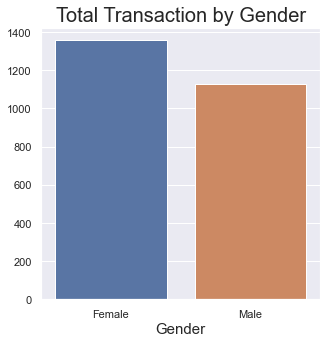

In [6]:
# 성별로 그룹핑 후 전체 거래 횟수 시각화
df_by_gender = df.groupby("Gender").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Gender", y=0, data=df_by_gender, order=df_by_gender.Gender)
ax.set_xlabel("Gender", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Gender", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Gender')

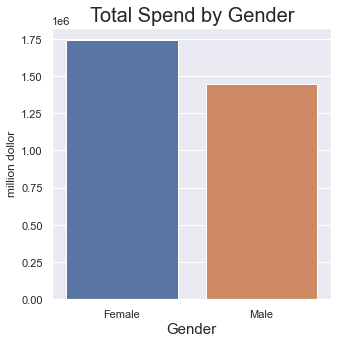

In [7]:
# 성별로 그룹핑 후 전체 소비액
df_by_gender = df.groupby("Gender").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Gender", y="Amount_spent", data=df_by_gender, order=df_by_gender.Gender)
ax.set_xlabel("Gender", fontsize=15)
ax.set_ylabel("million dollor")
ax.set_title("Total Spend by Gender", fontsize=20)

In [38]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Gender')

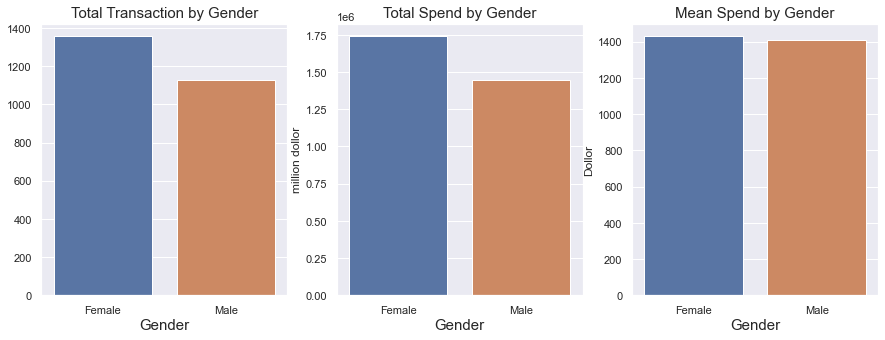

In [39]:
fig, ax = plt.subplots(ncols=3)
# 성별로 그룹핑하여 전체 거래 수
df_by_gender = df.groupby("Gender").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Gender", y=0, data=df_by_gender, order=df_by_gender.Gender, ax=ax[0])
ax1.set_xlabel("Gender", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Gender", fontsize=15)
# 성별로 그룹핑하여 총액
df_by_gender = df.groupby("Gender").sum().reset_index()
ax2 = sns.barplot(x="Gender", y="Amount_spent", data=df_by_gender, order=df_by_gender.Gender, ax=ax[1])
ax2.set_xlabel("Gender", fontsize=15)
ax2.set_ylabel("million dollor")
ax2.set_title("Total Spend by Gender", fontsize=15)
# 성별로 그룹핑하여 평균 소비액
df_by_gender = df.groupby("Gender").mean().reset_index()
ax3 = sns.barplot(x="Gender", y="Amount_spent", data=df_by_gender, order=df_by_gender.Gender, ax=ax[2])
ax3.set_xlabel("Gender", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Gender", fontsize=15)

#### Plotly graphic_object

In [58]:
# 성별로 그룹핑 후 전체 거래 횟수 시각화
df_by_gender = df.groupby("Gender").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_gender['Gender'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_gender['Gender'], y=df_by_gender[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total transaction by Gender',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [60]:
# 성별로 그룹핑 후 총액 시각화
df_by_gender = df.groupby("Gender").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_gender['Gender'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_gender['Gender'], y=df_by_gender['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Gender',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [79]:
# 성별로 그룹핑 후 평균 소비액 시각화
df_by_gender = df.groupby("Gender").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_gender['Gender'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_gender['Gender'], y=df_by_gender['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Gender',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn Pie Graph

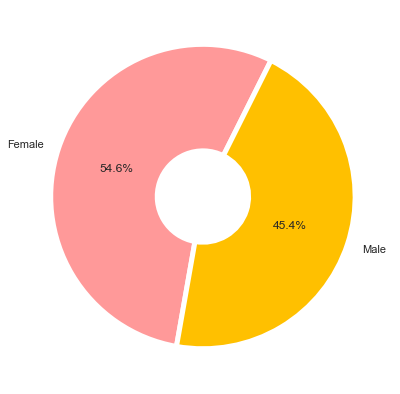

In [9]:
# 성별 총액 비율
plt.rcParams["figure.figsize"] = (7, 7)
df_by_gender = df.groupby("Gender").sum().reset_index()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_gender["Amount_spent"], labels=df_by_gender["Gender"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프

In [84]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_gender = df.groupby("Gender").sum().reset_index()
fig = px.pie(df_by_gender, values='Amount_spent', names='Gender', hole=.3)
fig.show()

### 혼인 여부 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Marital_status')

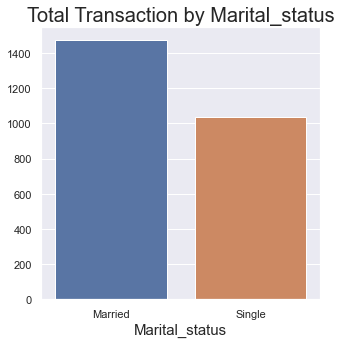

In [10]:
# 혼인 여부로 그룹핑하여 전체 거래 수
df_by_martial = df.groupby("Marital_status").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Marital_status", y=0, data=df_by_martial, order=df_by_martial.Marital_status)
ax.set_xlabel("Marital_status", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Marital_status", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Marital_status')

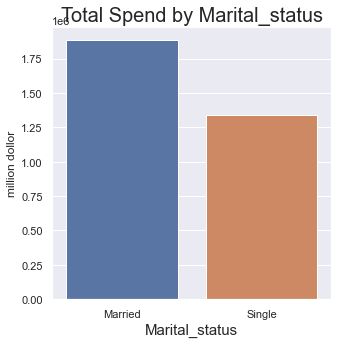

In [11]:
# 혼인 여부로 총액 그룹핑
df_by_martial = df.groupby("Marital_status").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Marital_status", y="Amount_spent", data=df_by_martial, order=df_by_martial.Marital_status)
ax.set_xlabel("Marital_status", fontsize=15)
ax.set_ylabel("million dollor")
ax.set_title("Total Spend by Marital_status", fontsize=20)

In [12]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Marital_status')

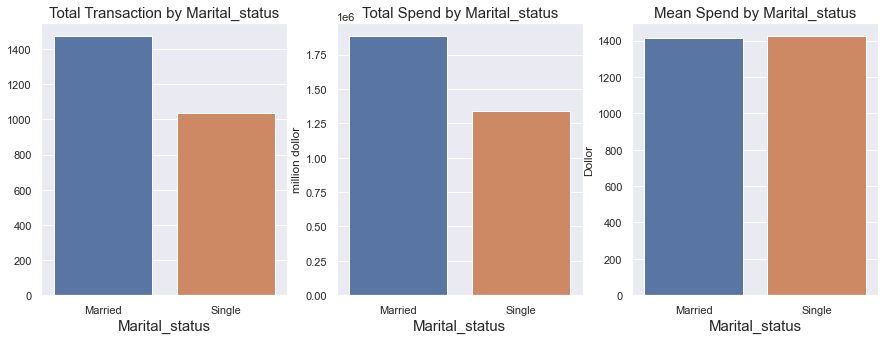

In [13]:
fig, ax = plt.subplots(ncols=3)
# 혼인 여부로 그룹핑하여 전체 거래 수
df_by_martial = df.groupby("Marital_status").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Marital_status", y=0, data=df_by_martial, order=df_by_martial.Marital_status, ax=ax[0])
ax1.set_xlabel("Marital_status", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Marital_status", fontsize=15)
# 혼인 여부로 그룹핑하여 총액
df_by_martial = df.groupby("Marital_status").sum().reset_index()
ax2 = sns.barplot(x="Marital_status", y="Amount_spent", data=df_by_martial, order=df_by_martial.Marital_status, ax=ax[1])
ax2.set_xlabel("Marital_status", fontsize=15)
ax2.set_ylabel("million dollor")
ax2.set_title("Total Spend by Marital_status", fontsize=15)
# 혼인 여부로 그룹핑하여 평균 소비액
df_by_martial = df.groupby("Marital_status").mean().reset_index()
ax3 = sns.barplot(x="Marital_status", y="Amount_spent", data=df_by_martial, order=df_by_martial.Marital_status, ax=ax[2])
ax3.set_xlabel("Marital_status", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Marital_status", fontsize=15)

#### Plotly 막대 그래프

In [65]:
# 결혼 여부로 그룹핑 후 거래 횟수 시각화
df_by_martial = df.groupby("Marital_status").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_martial['Marital_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_martial['Marital_status'], y=df_by_martial[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Transaction by Marital_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [67]:
# 결혼 여부로 그룹핑 후 총액 시각화
df_by_martial = df.groupby("Marital_status").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_martial['Marital_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_martial['Marital_status'], y=df_by_martial['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Marital_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [68]:
# 결혼 여부로 그룹핑 후 평균 소비액 시각화
df_by_martial = df.groupby("Marital_status").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_martial['Marital_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_martial['Marital_status'], y=df_by_martial['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Marital_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn 파이 그래프

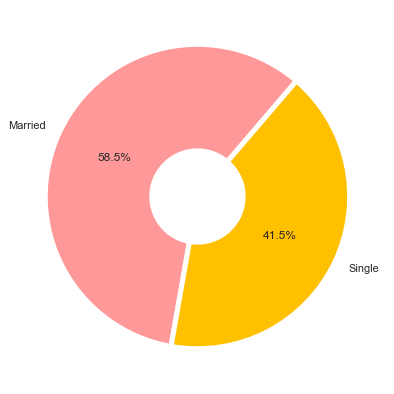

In [14]:
# 결혼 여부 총액 비율
plt.rcParams["figure.figsize"] = (7, 7)
df_by_martial = df.groupby("Marital_status").sum().reset_index()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_martial["Amount_spent"], labels=df_by_martial["Marital_status"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프
1. hole 인자는 가운데 구멍 크기 0.3 = 30%

In [85]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_martial = df.groupby("Marital_status").sum().reset_index()
fig = px.pie(df_by_martial, values='Amount_spent', names='Marital_status', hole=.3)
fig.show()

### 지역으로 그룹핑

Text(0.5, 1.0, 'Total Transaction by State')

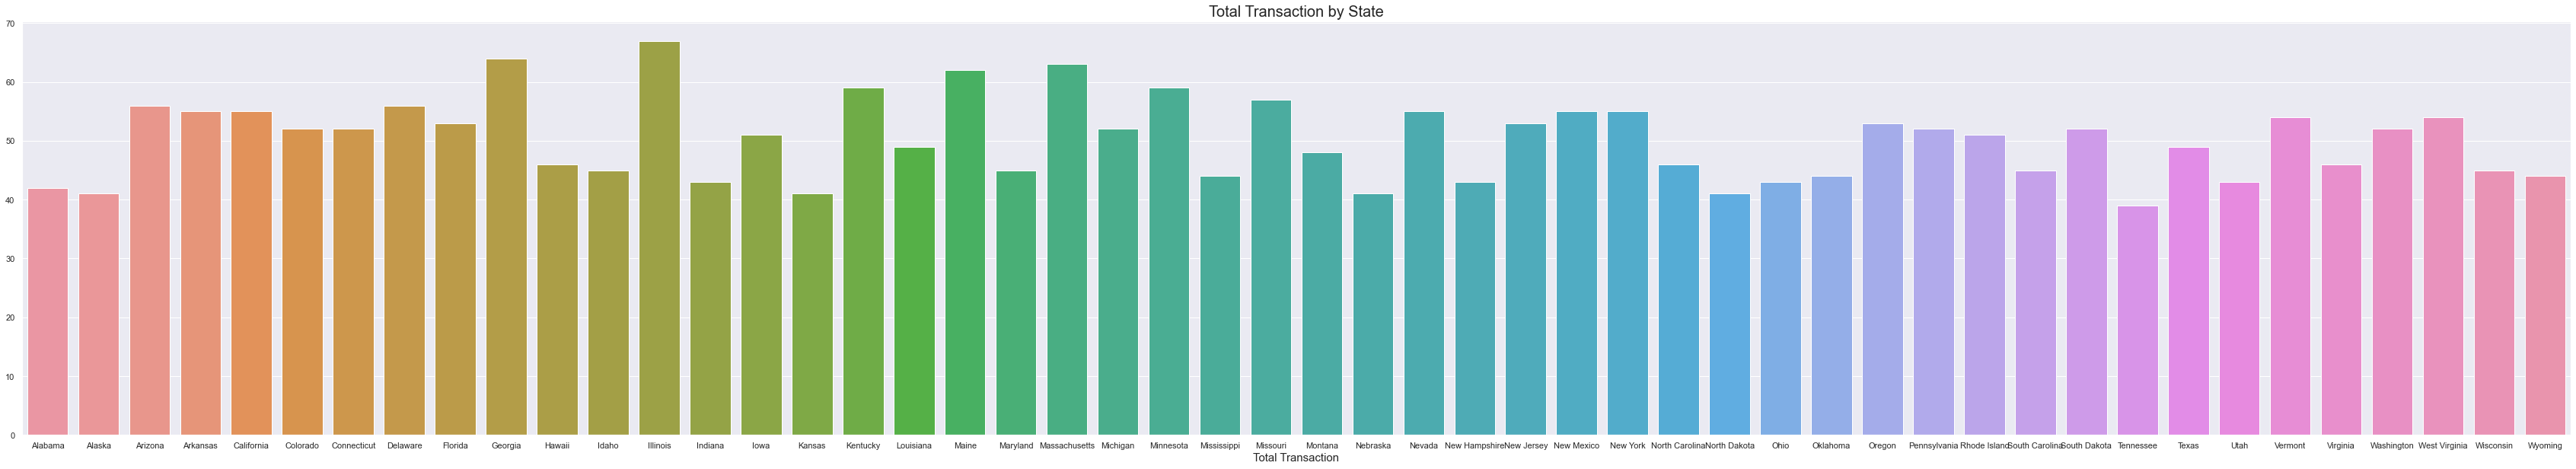

In [15]:
# 지역으로 그룹핑
df_by_state = df.groupby("State_names").size().reset_index()
plt.rcParams["figure.figsize"] = (60, 10)
ax = sns.barplot(x="State_names", y=0, data=df_by_state, order=df_by_state.State_names)
ax.set_xlabel("Total Transaction", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by State", fontsize=20)

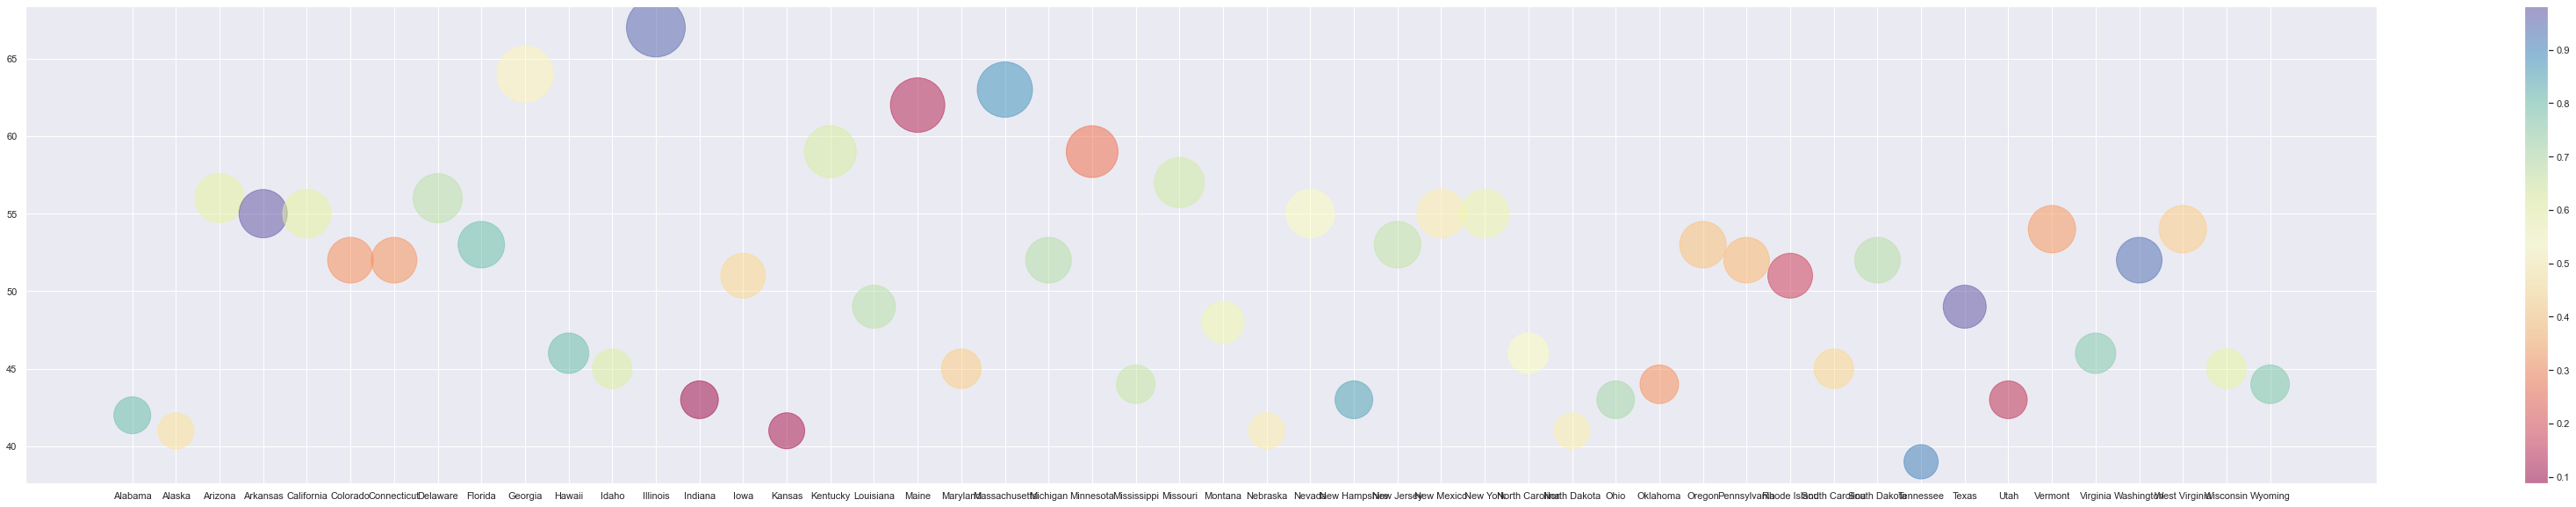

In [16]:
area = (df_by_state[0])**2  # 발생 건수에 따라 크기 조절
colors = np.random.rand(len(df_by_state["State_names"])) # xtick 길이만큼 색상 매번 랜덤

plt.scatter(df_by_state["State_names"], df_by_state[0], s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

### 멤버십 등급 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Segment')

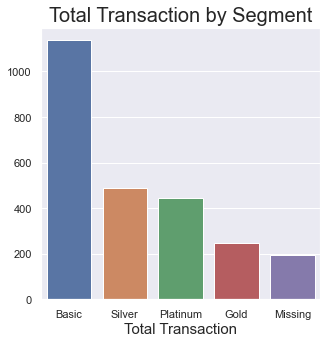

In [17]:
# 멤버쉽 등급으로 그룹핑 - 총 거래 수
df_by_segment = df.groupby("Segment").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Segment", y=0, data=df_by_segment, order=df_by_segment.Segment)
ax.set_xlabel("Total Transaction", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Segment", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Segment')

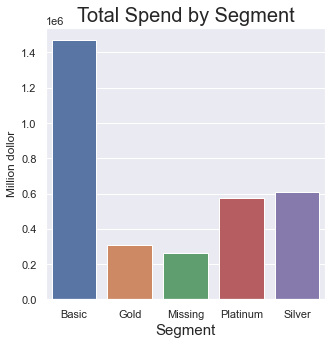

In [18]:
# 멤버쉽 등급으로 그룹핑 - 총 소비 액수
df_by_segment = df.groupby("Segment").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Segment", y="Amount_spent", data=df_by_segment, order=df_by_segment.Segment)
ax.set_xlabel("Segment", fontsize=15)
ax.set_ylabel("Million dollor")
ax.set_title("Total Spend by Segment", fontsize=20)

In [20]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Segment')

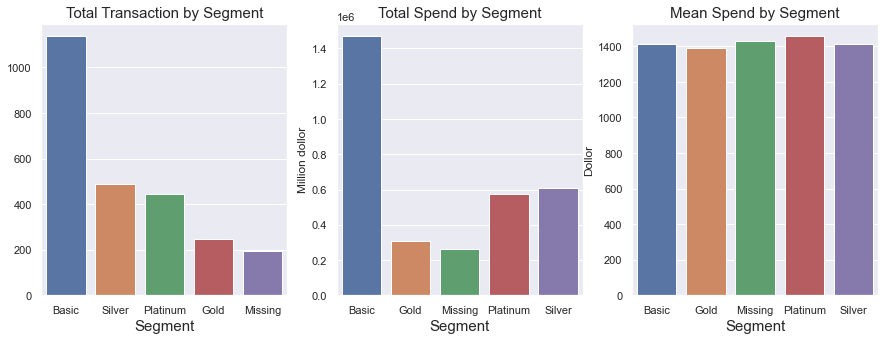

In [21]:
fig, ax = plt.subplots(ncols=3)

df_by_segment = df.groupby("Segment").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Segment", y=0, data=df_by_segment, order=df_by_segment.Segment, ax = ax[0])
ax1.set_xlabel("Segment", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Segment", fontsize=15)

df_by_segment = df.groupby("Segment").sum().reset_index()
ax2 = sns.barplot(x="Segment", y="Amount_spent", data=df_by_segment, order=df_by_segment.Segment, ax=ax[1])
ax2.set_xlabel("Segment", fontsize=15)
ax2.set_ylabel("Million dollor")
ax2.set_title("Total Spend by Segment", fontsize=15)

# 등급별 평균 소비 액수
df_by_segment = df.groupby("Segment").mean().reset_index()
ax3 = sns.barplot(x="Segment", y="Amount_spent", data=df_by_segment, order=df_by_segment.Segment, ax=ax[2])
ax3.set_xlabel("Segment", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Segment", fontsize=15)

#### Plotly 막대 그래프

In [75]:
# 등급별로 그룹핑하여 전체 거래 횟수
df_by_segment = df.groupby("Segment").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Segment'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Segment'], y=df_by_segment[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Transaction by Segment',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [74]:
# 등급별로 그룹핑하여 전체 거래 횟수
df_by_segment = df.groupby("Segment").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Segment'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Segment'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Segment',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [73]:
# 등급별로 그룹핑하여 전체 거래 횟수
df_by_segment = df.groupby("Segment").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Segment'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Segment'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Segment',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn 파이 그래프

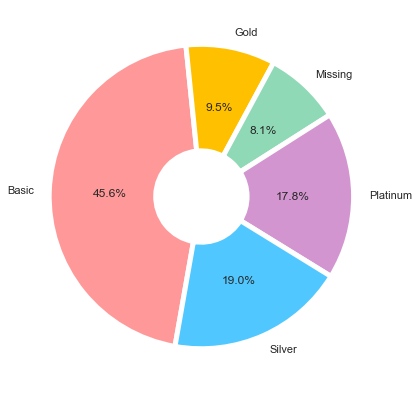

In [22]:
# 총액 비율
df_by_segment = df.groupby("Segment").sum().reset_index()
plt.rcParams["figure.figsize"] = (7, 7)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#50C8FF"]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_segment["Amount_spent"], labels=df_by_segment["Segment"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프

In [86]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_segment = df.groupby("Segment").sum().reset_index()
fig = px.pie(df_by_segment, values='Amount_spent', names='Segment', hole=.3)
fig.show()

### 구직 상태로 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Employees_status')

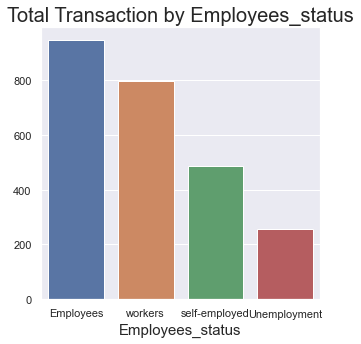

In [23]:
# 구직 상태로 그룹핑
df_by_employee = df.groupby("Employees_status").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Employees_status", y=0, data=df_by_employee, order=df_by_employee.Employees_status)
ax.set_xlabel("Employees_status", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Employees_status", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Employees_status')

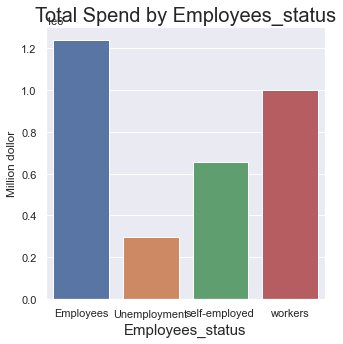

In [24]:
df_by_employee = df.groupby("Employees_status").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Employees_status", y="Amount_spent", data=df_by_employee, order=df_by_employee.Employees_status)
ax.set_xlabel("Employees_status", fontsize=15)
ax.set_ylabel("Million dollor")
ax.set_title("Total Spend by Employees_status", fontsize=20)

In [25]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Employees_status')

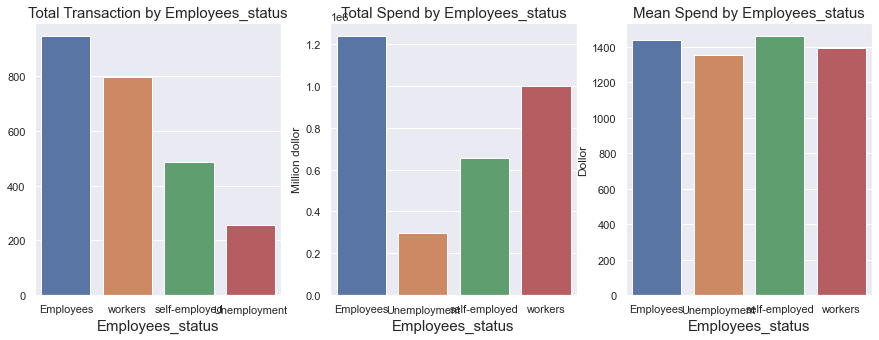

In [26]:
fig, ax = plt.subplots(ncols=3)
df_by_employee = df.groupby("Employees_status").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Employees_status", y=0, data=df_by_employee, order=df_by_employee.Employees_status, ax=ax[0])
ax1.set_xlabel("Employees_status", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Employees_status", fontsize=15)

df_by_employee = df.groupby("Employees_status").sum().reset_index()
ax2 = sns.barplot(x="Employees_status", y="Amount_spent", data=df_by_employee, order=df_by_employee.Employees_status, ax=ax[1])
ax2.set_xlabel("Employees_status", fontsize=15)
ax2.set_ylabel("Million dollor")
ax2.set_title("Total Spend by Employees_status", fontsize=15)

# 구직 상태 별 평균 소비액
df_by_employee = df.groupby("Employees_status").mean().reset_index()
ax3 = sns.barplot(x="Employees_status", y="Amount_spent", data=df_by_employee, order=df_by_employee.Employees_status, ax=ax[2])
ax3.set_xlabel("Employees_status", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Employees_status", fontsize=15)

#### Ploty 막대 그래프

In [76]:
# 구직 상태로 그룹핑하여 전체 거래 수
df_by_segment = df.groupby("Employees_status").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Employees_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Employees_status'], y=df_by_segment[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Transaction by Employees_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [77]:
# 구직 상태로 그룹핑하여 총액
df_by_segment = df.groupby("Employees_status").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Employees_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Employees_status'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Employees_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [78]:
# 구직 상태로 그룹핑하여 평균 소비액
df_by_segment = df.groupby("Employees_status").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Employees_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Employees_status'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Employees_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn 파이 그래프

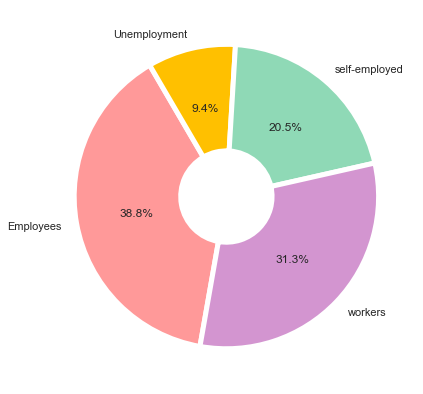

In [27]:
# 전체 총액 비율
df_by_employee = df.groupby("Employees_status").sum().reset_index()
plt.rcParams["figure.figsize"] = (7, 7)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#50C8FF"]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_employee["Amount_spent"], labels=df_by_employee["Employees_status"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프

In [88]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_employee = df.groupby("Employees_status").sum().reset_index()
fig = px.pie(df_by_employee, values='Amount_spent', names='Employees_status', hole=.3)
fig.show()

### Faceted logistic regression - implot

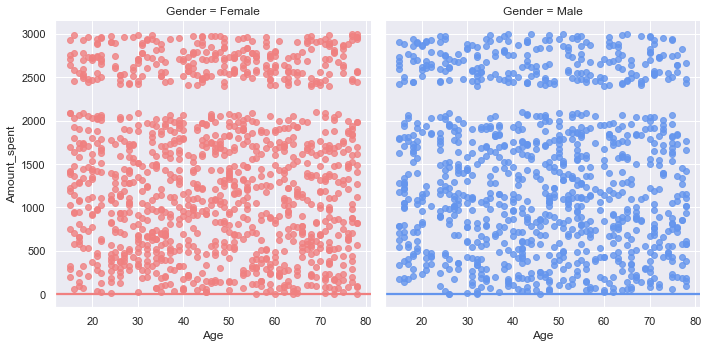

In [28]:
pal = dict(Male="#6495ED", Female="#F08080")
g = sns.lmplot(x="Age", y="Amount_spent", col="Gender", hue="Gender", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)

### 회귀 분석

In [29]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [30]:
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df_te = pd.DataFrame(te_ary, columns=te.columns_)
df_te

,A,D,E,G,I,M,P,R,S,T,...,l,m,n,o,p,r,s,t,u,y
0,False,True,False,False,True,False,False,False,False,True,...,False,False,True,True,False,True,True,True,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,True,True,True,False
4,False,False,False,False,False,False,False,False,True,False,...,False,True,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2510,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
itemsets = apriori(df_te, min_support=0.05, use_colnames=True)

In [32]:
itemsets

,support,itemsets


In [33]:
association_rules(itemsets, metric="lift", min_threshold=1)
# 지지도 0.05 이상이 하나도 없어서 개같이 멸망

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

### 상관관계 분석

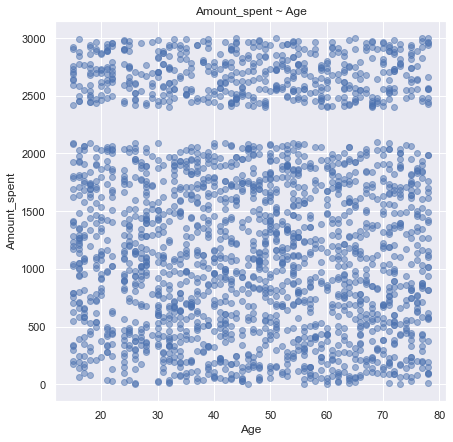

In [34]:
# Age와 Amount_spent 상관 분석
X = df.Age.values
Y = df.Amount_spent.values 
plt.scatter(X, Y, alpha=0.5) 
plt.title('Amount_spent ~ Age') 
plt.xlabel('Age') 
plt.ylabel('Amount_spent') 
plt.show()
# 대각선으로 올라가거나 내려가면 양/음의 상관관계인 것
# 누가 봐도 관련 없어 보임